In [2]:
import networkx as nx
import pandas as pd

In [25]:
data = {
    'Location': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 8],
    'Adjacent_Location': [2, 3, 1, 4, 2, 5, 3, 6, 4, 7, 5, 8, 6, 8, 7, 6, 6],
    'Distance': [10, 15, 10, 20, 15, 12, 20, 25, 12, 18, 20, 22, 18, 10, 22, 28, 10]
}

df = pd.DataFrame(data)


In [24]:
df

,Location,Adjacent_Location,Distance
0,1,2,10
1,1,3,15
2,2,1,10
3,2,4,20
4,3,2,15
5,3,5,12
6,4,3,20
7,4,6,25
8,5,4,12
9,5,7,18


In [26]:
G = nx.DiGraph()


In [27]:
for _, row in df.iterrows():
    G.add_edge(row['Location'], row['Adjacent_Location'], weight=row['Distance'])


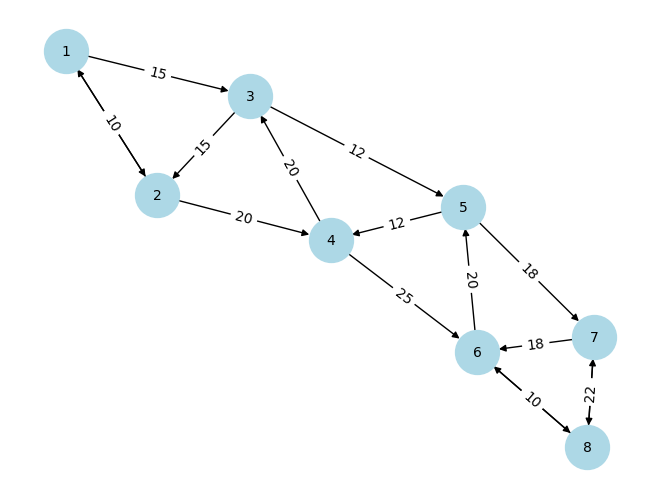

In [28]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G)  # positions for all nodes

nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, font_color='black')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()


ALL SIMPLE PATHS!!!!!

In [30]:
for path in nx.all_simple_paths(G, source=1, target=8):
    print(path)



[1, 2, 4, 3, 5, 7, 6, 8]
[1, 2, 4, 3, 5, 7, 8]
[1, 2, 4, 6, 5, 7, 8]
[1, 2, 4, 6, 8]
[1, 3, 2, 4, 6, 5, 7, 8]
[1, 3, 2, 4, 6, 8]
[1, 3, 5, 4, 6, 8]
[1, 3, 5, 7, 6, 8]
[1, 3, 5, 7, 8]


In [31]:
path = [1, 2, 4, 3, 5, 7, 6, 8]
nx.path_weight(G, path, weight = 'weight')

120

In [32]:
paths = []
weights = []

for path in nx.all_simple_paths(G, source=1, target=8):
    new_weight = nx.path_weight(G, path, weight = 'weight')
    paths.append(path)
    weights.append(new_weight)



In [33]:
paths_DF = pd.DataFrame({'paths':paths, 'Weights':weights})

In [34]:
paths_DF

,paths,Weights
0,"[1, 2, 4, 3, 5, 7, 6, 8]",120
1,"[1, 2, 4, 3, 5, 7, 8]",90
2,"[1, 2, 4, 6, 5, 7, 8]",103
3,"[1, 2, 4, 6, 8]",77
4,"[1, 3, 2, 4, 6, 5, 7, 8]",123
5,"[1, 3, 2, 4, 6, 8]",97
6,"[1, 3, 5, 4, 6, 8]",86
7,"[1, 3, 5, 7, 6, 8]",85
8,"[1, 3, 5, 7, 8]",55


In [52]:
result_list = []
path_combo_list = []

for path in paths_DF['paths']:
    path_combinations = []
    for i in range(len(path)):
        for j in range(i + 1, len(path)):
            path_combinations.append((path[i],path[j]))
    result_list.append(path_combinations)

# Print the result_list or perform further processing
for path_combinations in result_list:
    path_combo_list.append(path_combinations)


In [123]:
len(path_combo_list[0])

28

In [41]:
pd.DataFrame({'paths':paths, 'Weights':weights, 'path_combo_list': path_combo_list})

,paths,Weights,path_combo_list
0,"[1, 2, 4, 3, 5, 7, 6, 8]",120,"[[1, 2], [1, 4], [1, 3], [1, 5], [1, 7], [1, 6..."
1,"[1, 2, 4, 3, 5, 7, 8]",90,"[[1, 2], [1, 4], [1, 3], [1, 5], [1, 7], [1, 8..."
2,"[1, 2, 4, 6, 5, 7, 8]",103,"[[1, 2], [1, 4], [1, 6], [1, 5], [1, 7], [1, 8..."
3,"[1, 2, 4, 6, 8]",77,"[[1, 2], [1, 4], [1, 6], [1, 8], [2, 4], [2, 6..."
4,"[1, 3, 2, 4, 6, 5, 7, 8]",123,"[[1, 3], [1, 2], [1, 4], [1, 6], [1, 5], [1, 7..."
5,"[1, 3, 2, 4, 6, 8]",97,"[[1, 3], [1, 2], [1, 4], [1, 6], [1, 8], [3, 2..."
6,"[1, 3, 5, 4, 6, 8]",86,"[[1, 3], [1, 5], [1, 4], [1, 6], [1, 8], [3, 5..."
7,"[1, 3, 5, 7, 6, 8]",85,"[[1, 3], [1, 5], [1, 7], [1, 6], [1, 8], [3, 5..."
8,"[1, 3, 5, 7, 8]",55,"[[1, 3], [1, 5], [1, 7], [1, 8], [3, 5], [3, 7..."


In [51]:
#this needs to be on the original dataframe
result_dict = {}

for loc, adj_loc, dist in zip(data['Location'], data['Adjacent_Location'], data['Distance']):
    key = (loc, adj_loc)  # Combine loc and adj_loc into a tuple
    result_dict[key] = dist

result_dict

{(1, 2): 10,
 (1, 3): 15,
 (2, 1): 10,
 (2, 4): 20,
 (3, 2): 15,
 (3, 5): 12,
 (4, 3): 20,
 (4, 6): 25,
 (5, 4): 12,
 (5, 7): 18,
 (6, 5): 20,
 (6, 8): 22,
 (7, 6): 18,
 (7, 8): 10,
 (8, 7): 22,
 (8, 6): 10}

In [89]:
numbers = []
for x in range(1,9):
    for y in range(1,9):
        numbers.append((x,y))
        numbers.append((y,x))
numbers

[(1, 1),
 (1, 1),
 (1, 2),
 (2, 1),
 (1, 3),
 (3, 1),
 (1, 4),
 (4, 1),
 (1, 5),
 (5, 1),
 (1, 6),
 (6, 1),
 (1, 7),
 (7, 1),
 (1, 8),
 (8, 1),
 (2, 1),
 (1, 2),
 (2, 2),
 (2, 2),
 (2, 3),
 (3, 2),
 (2, 4),
 (4, 2),
 (2, 5),
 (5, 2),
 (2, 6),
 (6, 2),
 (2, 7),
 (7, 2),
 (2, 8),
 (8, 2),
 (3, 1),
 (1, 3),
 (3, 2),
 (2, 3),
 (3, 3),
 (3, 3),
 (3, 4),
 (4, 3),
 (3, 5),
 (5, 3),
 (3, 6),
 (6, 3),
 (3, 7),
 (7, 3),
 (3, 8),
 (8, 3),
 (4, 1),
 (1, 4),
 (4, 2),
 (2, 4),
 (4, 3),
 (3, 4),
 (4, 4),
 (4, 4),
 (4, 5),
 (5, 4),
 (4, 6),
 (6, 4),
 (4, 7),
 (7, 4),
 (4, 8),
 (8, 4),
 (5, 1),
 (1, 5),
 (5, 2),
 (2, 5),
 (5, 3),
 (3, 5),
 (5, 4),
 (4, 5),
 (5, 5),
 (5, 5),
 (5, 6),
 (6, 5),
 (5, 7),
 (7, 5),
 (5, 8),
 (8, 5),
 (6, 1),
 (1, 6),
 (6, 2),
 (2, 6),
 (6, 3),
 (3, 6),
 (6, 4),
 (4, 6),
 (6, 5),
 (5, 6),
 (6, 6),
 (6, 6),
 (6, 7),
 (7, 6),
 (6, 8),
 (8, 6),
 (7, 1),
 (1, 7),
 (7, 2),
 (2, 7),
 (7, 3),
 (3, 7),
 (7, 4),
 (4, 7),
 (7, 5),
 (5, 7),
 (7, 6),
 (6, 7),
 (7, 7),
 (7, 7),
 (7, 8),
 

In [81]:
import random

random_numbers = [random.randint(1, 100) for _ in range(128)]

In [88]:
numbers

(8, 8)

In [90]:
#this needs to be on the original dataframe
result_dict = {}

for number, dist in zip(numbers, random_numbers):
    key = number  # Combine loc and adj_loc into a tuple
    result_dict[key] = dist

result_dict

{(1, 1): 87,
 (1, 2): 25,
 (2, 1): 6,
 (1, 3): 2,
 (3, 1): 58,
 (1, 4): 30,
 (4, 1): 68,
 (1, 5): 56,
 (5, 1): 73,
 (1, 6): 94,
 (6, 1): 33,
 (1, 7): 22,
 (7, 1): 48,
 (1, 8): 58,
 (8, 1): 62,
 (2, 2): 88,
 (2, 3): 28,
 (3, 2): 81,
 (2, 4): 46,
 (4, 2): 90,
 (2, 5): 33,
 (5, 2): 91,
 (2, 6): 94,
 (6, 2): 55,
 (2, 7): 65,
 (7, 2): 4,
 (2, 8): 64,
 (8, 2): 47,
 (3, 3): 78,
 (3, 4): 59,
 (4, 3): 59,
 (3, 5): 95,
 (5, 3): 58,
 (3, 6): 59,
 (6, 3): 15,
 (3, 7): 35,
 (7, 3): 53,
 (3, 8): 57,
 (8, 3): 38,
 (4, 4): 19,
 (4, 5): 83,
 (5, 4): 35,
 (4, 6): 2,
 (6, 4): 8,
 (4, 7): 95,
 (7, 4): 68,
 (4, 8): 82,
 (8, 4): 60,
 (5, 5): 26,
 (5, 6): 71,
 (6, 5): 57,
 (5, 7): 37,
 (7, 5): 98,
 (5, 8): 70,
 (8, 5): 41,
 (6, 6): 7,
 (6, 7): 38,
 (7, 6): 94,
 (6, 8): 36,
 (8, 6): 49,
 (7, 7): 23,
 (7, 8): 4,
 (8, 7): 53,
 (8, 8): 23}

In [109]:
sums = []
for l in range(len(path_combo_list)):
    list1 = []
    for val in range(len(path_combo_list[l])):
        list1.append(result_dict[(path_combo_list[l][val])])
    sumnums = sum(list1)
    sums.append(sumnums)


In [117]:
pathdf = pd.DataFrame({'paths':paths, 'Weights':weights, 'path_combo_list': path_combo_list, 'sums': sums})

In [140]:
lengths = []
for x in range(len(path_combo_list)):
    lengths.append(len(path_combo_list[x]))

lengths

[28, 21, 21, 10, 28, 15, 15, 15, 10]

In [141]:
pathdf['lengths'] = lengths

In [143]:
pathdf['total_weight'] = pathdf['Weights'] +pathdf['sums']

In [144]:
pathdf

,paths,Weights,path_combo_list,sums,lengths,total_weight
0,"[1, 2, 4, 3, 5, 7, 6, 8]",120,"[(1, 2), (1, 4), (1, 3), (1, 5), (1, 7), (1, 6...",1496,28,1616
1,"[1, 2, 4, 3, 5, 7, 8]",90,"[(1, 2), (1, 4), (1, 3), (1, 5), (1, 7), (1, 8...",1046,21,1136
2,"[1, 2, 4, 6, 5, 7, 8]",103,"[(1, 2), (1, 4), (1, 6), (1, 5), (1, 7), (1, 8...",1091,21,1194
3,"[1, 2, 4, 6, 8]",77,"[(1, 2), (1, 4), (1, 6), (1, 8), (2, 4), (2, 6...",531,10,608
4,"[1, 3, 2, 4, 6, 5, 7, 8]",123,"[(1, 3), (1, 2), (1, 4), (1, 6), (1, 5), (1, 7...",1479,28,1602
5,"[1, 3, 2, 4, 6, 8]",97,"[(1, 3), (1, 2), (1, 4), (1, 6), (1, 8), (3, 2...",789,15,886
6,"[1, 3, 5, 4, 6, 8]",86,"[(1, 3), (1, 5), (1, 4), (1, 6), (1, 8), (3, 5...",806,15,892
7,"[1, 3, 5, 7, 6, 8]",85,"[(1, 3), (1, 5), (1, 7), (1, 6), (1, 8), (3, 5...",790,15,875
8,"[1, 3, 5, 7, 8]",55,"[(1, 3), (1, 5), (1, 7), (1, 8), (3, 5), (3, 7...",436,10,491
